In [9]:
%matplotlib inline

from IPython.display import Image

import numpy as np

from qutip import *

from numba import vectorize,float64

import matplotlib.pyplot as plt

## Calculating Roland and Cerf's function

In their paper Roland and Cerf [RC01] showed that using adiabatic computation to perform Grover's algorithm on $n=log_2(N)$ qubits , with constant rate of hamiltonian variation, one will need to set the length of the process to be $T\ge\frac{N}{\epsilon}$ in order to keep the process adiabatic .

However he also showed that using if the rate of the variation is modified to be :

\begin{equation} 
 \frac{ds}{dt} = \epsilon g^2(t) = \epsilon [1-4\frac{N-1}{N}s(s-1)]
\end{equation}

one can maintain the adiabatic condition :
$$|\frac{ds}{dt}| \le  \epsilon \frac{g^2(t)}{|<\frac{d\bar H}{ds}>|_{1,0}} $$
while keeping the overall process length to $T = \frac{\pi}{2\epsilon}\sqrt{N}$

Integrating the function for $\frac{ds}{dt}$ we get:
$$s(t)=\frac{1}{2}(1-\frac{\sqrt{N-1}\,tan(\frac{2t\epsilon\sqrt{N-1}\,\, \;-\; N \,arctan(\sqrt{N-1})}{N})}{1-N})$$

In [38]:

epsilon = 0.1
n = 12
N = 2**n

def s_function(t ,N = 1024 , epsilon = 0.1 ):
    """Computes the rate function s(t)"""
    nomerator = np.sqrt(N-1) * np.tan((2 * t * epsilon * np.sqrt(N-1)  - N * np.arctan(np.sqrt(N-1)))/ N)
    denominator = 1 - N
    return 1/2*(1 - nomerator / denominator)


 We whish to find out where the function reaches 1, it can be done by numeric 
 search for solution of the s function, however a more efficient way would be to set s=1 in the inverse function :
 $$t= \frac{N}{2\epsilon \sqrt(N-1)}\Bigg[arctan \big( \sqrt{N-1}(2s-1)\big) +arctan \big( \sqrt{N-1}\big) \Bigg]$$
 to find it.


In [43]:
from scipy.optimize import fsolve
def find_s_one_numeric (s_function, N, epsilon):
    # We use hinge function to prevent negative solutions
    s_zero = lambda x: max(1 - s_function(x, N , epsilon),2-x)
    # Find closest solution to 0 for 1-s(t)=0
    return fsolve(s_zero,0)[0]
s_one_nu = find_s_one_numeric(s_function, N, epsilon)


# Or 
def find_s_one(N, epsilon):
    return 1/(2*epsilon) * N/np.sqrt((N-1)) * 2 * np.arctan(np.sqrt(N-1)) 
s_one = find_s_one( N, epsilon)
print ("Exact solution:%s\nNumeric solution %s" % (s_one_nu, s_one))

Exact solution:995.430762165
Numeric solution 995.430762165


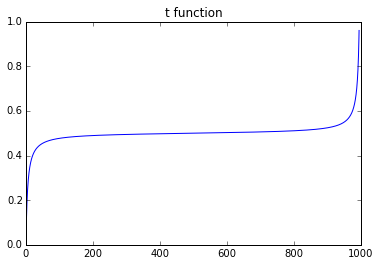

In [45]:
t = np.linspace(0,np.floor(s_one),1000000)
plt.plot(t,s_function(t, np.ones(len(t))*N, epsilon))
plt.title("t function")
plt.show()